1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


questi dati hanno un valor medio 99.88051915565232 e deviazione standard 0.8941310905474905


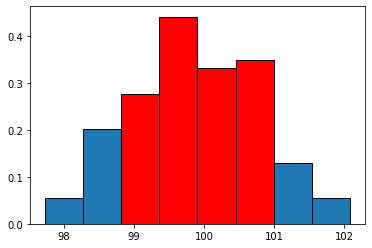

In [8]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 

x = np.array([np.random.normal(100) for i in range(100)])
# x distribuiti normalmente intorno al valore 100 con deviazione standard unitaria
print("questi dati hanno un valor medio {} e deviazione standard {}".format(np.mean(x),np.std(x)))
hist = plt.hist(x, bins = 'auto', edgecolor = 'black', density=True) 
# con normed i dati sono normalizzati nel senso che sulle ordinate compare non il numero di conteggi ma la densità di probabilità del bin ovvero i conteggi normalizzati rispetto al totale di valori contenuti in tutti i bin. Sommando le ordinate di tutti i bin otteniamo uno.
density, bins, patches = hist
# density è un array con tante righe quanti sono i bin. Le patches sono python objects che individuano le singole colonne che nell'istogramma contengono i conteggi. 
# ad esempio posso usare la conoscenza sulle patches per cambiare colore a quelle che rientrano nel limite di due sigma. Uso la funzione zip per avere una lista di tuples contenenti ciascuna il bin e la patch corrispondente.
# costruisco una lista con i limiti a sinistra dei bin
leftbinlist = []
minim = min(x)
width = (max(x)-min(x))/len(bins)
for i in range(len(bins)) :
    leftbinlist.append(minim + width)
    minim = minim + width
#print(lista[-1], max(x))
# non coincidono perchè lista è stata costruita a mano mentre max(x) proviene dalla distribuzione randomica dei dati, che pur sempre si trovano dentro i bin ma il più grande x non coincide quasi mai con il limite sinistro del bin calcolato
mapped = list(zip(leftbinlist, patches))
mean = np.mean(x)
std = np.std(x)
for i in range(len(leftbinlist)-1) :
    if mapped[i][0] < mean + std and mapped[i][0] > mean - std :
        mapped[i][1].set_facecolor('r')
plt.show()  

questi dati hanno un valor medio 99.98626754240871 e deviazione standard 1.0303778484789676
l'area sottesa dall'istogramma vale 56.72079858700812 
l'area sottesa dalla funzione KDE vale 56.72079858700812


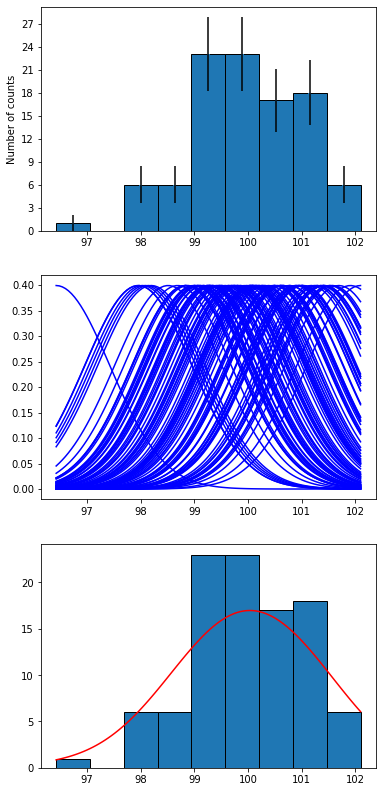

In [200]:
from matplotlib.ticker import MaxNLocator
from scipy.stats import norm
from scipy.integrate import trapz
x = np.array([np.random.normal(100) for i in range(100)])
print("questi dati hanno un valor medio {} e deviazione standard {}".format(np.mean(x),np.std(x)))
# adesso costruisco a mano la figura da rappresentare.
# L'istogramma avrà un numero di bins dato dall'argomento "auto", quest ultimo calcola il miglior numero di bin attraverso l'ottimizzazione di due algoritmi: vedi https://stackoverflow.com/questions/33458566/how-to-choose-bins-in-matplotlib-histogram
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (6,14))
# l'argomento di subplot figsize determina la dimensione del plot dell'ax che stiamo rappresentando
ax1.set_ylabel('Number of counts')
hist = ax1.hist(x, bins = 'auto', edgecolor = 'black')
counts, binedges, patches = hist
# il primo oggetto della tuple hist sono i conteggi di ogni bin. Per impostare dunque 
ax1.get_yaxis().set_major_locator(MaxNLocator(integer=True)) 
# a partire dall'axes prendiamo l'asse y e vi applichiamo il metodo .set_major_locator con il quale settiamo soltanto gli interi come ticks 
# adesso bisogna rappresentare ciascun bin come dei punti affetti da errore, pari a quello della distribuzione di Poisson sqrt(n) dove n è il numero di conteggi del bin. Pongo l'errore al centro di ogni bin che calcolo come 1/2 (lato sinistro + lato destro)
bincenters = 0.5*(binedges[1:]+binedges[:-1])
menstd = np.sqrt(counts)
width = 0.05
ax1.bar(bincenters, counts, width=width, yerr=menstd) 
# adesso bisogna creare un secondo plot con le gaussiane centrate in ogni punto dell'array. Quindi ben N pdf da rappresentare. Utilizzo un ciclo for per avere N distribuzioni con valor medio ogni punto in x e poi le rappresento in ax2
xplt = np.linspace(min(x), max(x), 100) 
y = np.zeros(shape = np.shape(xplt))
for point in x :
    ax2.plot(xplt, norm.pdf(xplt, point), 'b')
    y += norm.pdf(xplt, point)
    # una gaussiana con centro ciascuna in un punto dell'array x, per plottare però le distribuzioni è necessario un dominio di punti equispaziati ottenuti con linspace. 
    # in un terzo plot voglio rappresentare la somma di tutte queste gaussiane normalizzata all'area sottesa dall'istogramma di partenza. L'area dell'istogramma è uguale alla somma delle aree dei singoli patches: somma (spessore*counts)
areahist = 0
widthhist = (binedges[-1]-binedges[0])/len(binedges)
for i in range(len(counts)) :
    areahist += widthhist*counts[i]
areafun = trapz(y, x = xplt)
ax3.hist(x, bins = 'auto', edgecolor = 'black')
# calcolo il fattore di scala tra le due aree poi per linearità della funzione area moltiplico per tale fattore le ordinate della funzione y che ho trovato
scale = areahist/areafun
ax3.plot(xplt, y*scale, 'r')
print("l'area sottesa dall'istogramma vale", areahist,"\nl'area sottesa dalla funzione KDE vale", trapz(y*scale, x = xplt))

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

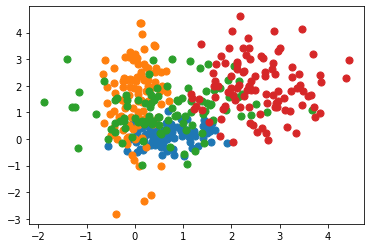

In [143]:
# Conviene creare un dataframe con classi pari alle categorie (che saranno i colori diversi) e per ogni clase due colonne con array x e y distribuiti normalmente con una certa media e varianza estratte a random. Oppure direttamente degli array bidimensionali da accoppiare ad una lista di colori. Innanzitutto provo con due datasets 
#def nrldatasets() :
mean = np.random.rand(2,)
var = np.diag(np.random.rand(2,))
# ogni volta son scelti randomicamente quindi potrei costruire una funzione che crea un singolo array x e chiamarla n volte 
def normal2D(lengtharray, shiftmean, shiftvar) :
    mean = np.random.rand(2,)*shiftmean
    var = np.diag(np.random.rand(2,))*shiftvar
    x = np.random.multivariate_normal(mean, var, lengtharray).T
    return x
# potrei generalizzare questo procedimento per N colori con un ciclo for e usando come c = ogni volta un colore diverso proveniente da una lista ad esempio
fig, ax = plt.subplots()
for i in range(4) : # posso scegliere qualsiasi numero oltre 4 
    ax.scatter(x = normal2D(100,np.random.uniform(0,3),np.random.uniform(0,3))[0,:], y = normal2D(100,np.random.uniform(0,3),np.random.uniform(0,3))[1,:], s = 50)
# Usando random.uniform faccio in modo che ogni serie di punti abbia un valor medio e varianza scelti randomicamente da un intervallo (anch esso si può scegliere e cambiare a priori). Così nel grafico posso apprezzare ogni set distinto da un altro avendo ognuno media e varianza distinti.

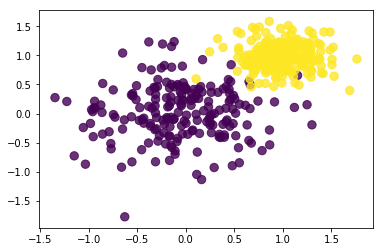

In [90]:
#!curl -O https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
filename = 'two_categories_scatter_plot.png'
Image(filename)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

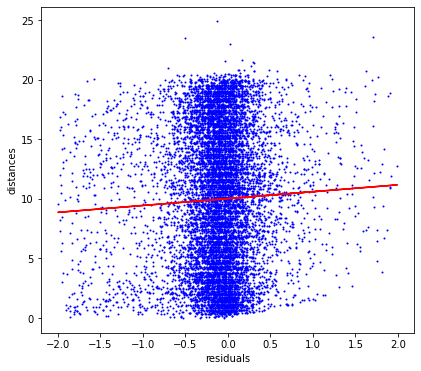

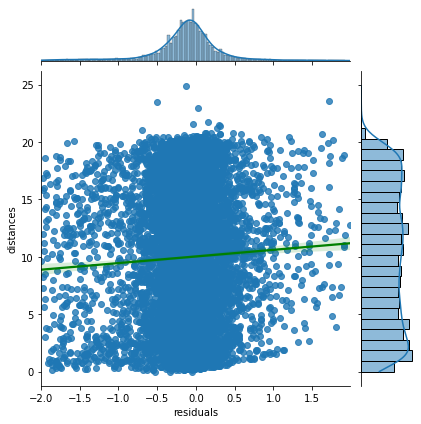

In [202]:
#! curl -O https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
import pandas as pd
from scipy import stats
import seaborn as sns

dataf = pd.DataFrame(np.load('residuals_261.npy', allow_pickle=True).item())
#display(dataf)
# per filtrare i dati come richiesto nel secondo punto applico una maschera logica 
dataclean = dataf[np.abs(dataf['residuals']) < 2]
#display(dataclean)
slope, intercept, r_value, p_value, std_err = stats.linregress(dataclean['residuals'], dataclean['distances'])
# vediamo adesso di rappresentare i dati di partenza e la linear regression ottenuta
fig, ax = plt.subplots(figsize = (6.69,6))
ax.scatter(dataclean['residuals'], dataclean['distances'], s = 1 , c = 'b')
ax.set_xlabel('residuals')
ax.set_ylabel('distances')
ax.plot(dataclean['residuals'], intercept + slope*dataclean['residuals'], 'r')
# adesso invece utilizzo seaborn per rappresentare i dati del dataframe dataclean
g = sns.jointplot(x = 'residuals', y = 'distances', data = dataclean, kind = 'reg', joint_kws={'line_kws':{'color':'green'}})



<ErrorbarContainer object of 3 artists>

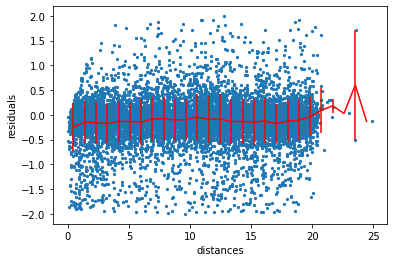

In [238]:
from scipy.stats import binned_statistic
z, binedges = np.histogram(dataclean['distances'], bins = 'auto') 
# z è un array di venti elementi quanti sono i bin che sono stati scelti dalla funzione np.histograms in automatico
#hist, binedges, patches = plt.hist(dataclean['distances'], bins='auto') stesso output però con matplotlib
bincenters = 0.5*(binedges[1:]+binedges[:-1])
# il centro di ogni bin
x = bincenters
# y deve essere un array lungo tanto quanto z, avente come elementi i valori medi di quei residuals dentro ciascun bin. Così anche erry conterrà le deviazioni standard di ogni gruppo di residuals. Posso usare la funzione stats.binned_statistic() con bin uguali a quelli che abbiamo calcolato con binedges. Come primo argomento si usa l'array da cui trarre i bin, il secondo è l'array del quale si calcolano le statistiche, il terzo sono invece le statistiche da calcolare (in questo caso la media e gli errori erry), il quarto  binedges calcolati da histogram precedentemente. 
y = binned_statistic(dataclean['distances'], dataclean['residuals'], statistic='mean', bins=binedges)[0]
erry = binned_statistic(dataclean['distances'], dataclean['residuals'], statistic='std', bins=binedges)[0]
# la funzione binned_statistic ritorna tre valori, a noi interessa il primo cioè l'array contenente le statistiche calcolate per ogni bin con all'interno i valori di dataclean['residuals']

# con profile plot intendiamo mostrare il trend che seguono i dati con i relativi errori per ciascun bin corrispondente dell'istogramma
plt.scatter(dataclean['distances'], dataclean['residuals'], s = 5)
plt.xlabel('distances')
plt.ylabel('residuals')
plt.errorbar(x,y, yerr = erry, color='r' ,ecolor='r')
